## Bokeh Demo Using SF Zillow Data

The demo starts with a simple way of using Matplotlib to plot house prices as a function of lot size based on some hand-selected Zillow data. The same plot is then created using Bokeh and gradually updated to:
* add a basic Bokeh tooltip;
* create a custom tooltip;
* use Bokeh and the Google Maps API to display the locations of the houses on a map.

In [1]:
import pandas as pd
import yaml

# convert addresses to coordinates
from geopy.geocoders import Nominatim

from bokeh.io import show, curdoc, output_notebook
from bokeh.plotting import figure, ColumnDataSource, output_file, show, gmap
from bokeh.models import HoverTool, GMapOptions

# styling for prettier matplotlib figures
import matplotlib.pyplot as plt
plt.rcParams.update({'xtick.labelsize': 16})
plt.rcParams.update({'ytick.labelsize': 16})
plt.rcParams.update({'axes.labelsize': 16})
plt.rcParams.update({'axes.labelpad': 14})

Read the Zillow data from the Excel file.

In [2]:
zillow_df = pd.read_excel('../data/zillow_data.xlsx')
zillow_df.head(3)

,Zillow Link,Lot Size,Bedrooms,Bathrooms,Address,City,State,Zip Code,Price
0,https://www.zillow.com/homedetails/1438-La-Pla...,1102,2,1.00,1438 La Playa St,San Francisco,CA,94122,995000
1,https://www.zillow.com/homedetails/1723-1725-1...,2080,4,2.25,1723 10th Ave,San Francisco,CA,93122,1850000
2,https://www.zillow.com/homedetails/53-Miramar-...,1440,3,1.50,53 Miramar Ave,San Francisco,CA,94112,899000


### 1. Plotting with Matplotlib

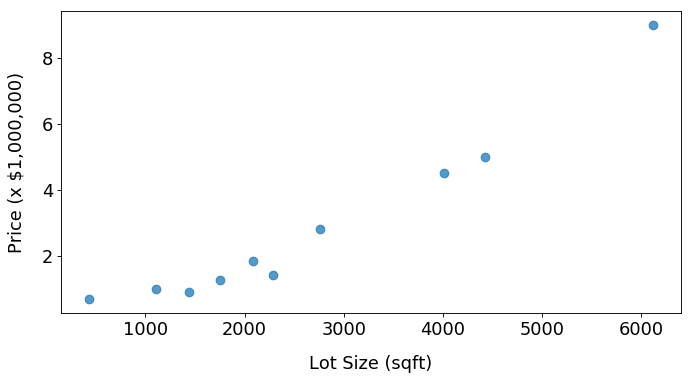

In [3]:
plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(zillow_df['Lot Size'], zillow_df['Price']/1e6, s=60, alpha=0.75)

plt.xlabel('Lot Size (sqft)')
plt.ylabel('Price (x $1,000,000)')

plt.show()

### 2. Plotting with Bokeh

#### 2.1. Basic Bokeh Plot

In [4]:
# clear any old plots
curdoc().clear()
output_notebook()

# these are the tools seen on the left side of the Bokeh plot
FIG_TOOLS = "pan,wheel_zoom,box_zoom,reset,crosshair,save"

p = figure(tools=FIG_TOOLS, width=800, height=400)

# Make renderer for the scatter plot.
price_vs_lot_size = p.scatter(x=zillow_df['Lot Size'], y=zillow_df['Price']/1e6, 
                              alpha=0.75, size=10)

p.xaxis.axis_label = 'Lot Size (sqft)'
p.yaxis.axis_label = 'Price (x $1,000,000)'

# some styling...
for pa_name in ['xaxis', 'yaxis']: 
    pa_axis = getattr(p, pa_name)
    pa_axis.axis_label_text_font_size = '14pt'
    pa_axis.axis_label_text_font_style = 'normal'
    pa_axis.major_label_text_font_size = '12pt'
    pa_axis.axis_label_standoff = 20

show(p)

Loading BokehJS ...

#### 2.2. Bokeh Plot with Basic Tooltip

In [5]:
# put all the data in a dictionary before creating the ColumnDataSource
data = dict(link = zillow_df['Zillow Link'],
            lotsize = zillow_df['Lot Size'],
            n_bedrooms = zillow_df['Bedrooms'],
            n_bathrooms = zillow_df['Bathrooms'],
            address = zillow_df['Address'],
            city = zillow_df['City'],
            state = zillow_df['State'],
            zipcode = zillow_df['Zip Code'],
            price = zillow_df['Price']/1e6)

# used in the plots to map the names of the columns to arrays
source = ColumnDataSource(data)

# set the fields in the tooltip
TOOLTIPS = [("Address", "@address, @city, @state @zipcode"),
            ("Bedrooms", "@n_bedrooms"),
            ("Bathrooms", "@n_bathrooms"),
            ("Lot size", "@lotsize sqft"),
            ("Price", "@price million dollars")]

p = figure(tools=FIG_TOOLS, width=800, height=400)

# Can do things like x='lotsize' because of the mapping done 
# by the ColumnDataSource named source.
p.scatter(x='lotsize', y='price', alpha=0.75, size=10, source=source)

# add tooltip to figure
p.add_tools(HoverTool(tooltips=TOOLTIPS))

p.xaxis.axis_label = 'Lot Size (sqft)'
p.yaxis.axis_label = 'Price (x $1,000,000)'

for pa_name in ['xaxis', 'yaxis']: 
    pa_axis = getattr(p, pa_name)
    pa_axis.axis_label_text_font_size = '14pt'
    pa_axis.axis_label_text_font_style = 'normal'
    pa_axis.major_label_text_font_size = '12pt'
    pa_axis.axis_label_standoff = 20

show(p)

#### 2.3. Bokeh Plot with Custom Tooltip

In [6]:
# Custom tooltip, because the default is ugly.
# My HTML is too, but hey, it works... :-/
TOOLTIPS = """
           <div>
               <div>
                   <img
                       src="http://zillow.mediaroom.com/download/Zillow_Wordmark_Blue_RGB+lrg.png" 
                            height="15" width="70"
                       style="float: left; margin: 12px 25px 15px 10px;">
                   </img>
               </div>
               <div style="width: 30em; word-wrap: break-word;
                           margin: 0px 0px 0px 10px">
                   <p style="font-size: 14px; font-style: italic; font-weight: bold; 
                             color: #000000; background-color: #FFFFFF;">
                                    @address</br>@city, @state @zipcode
                   </p>
                   <table style="font-size: 14px; width: 25em;">
                       <tr>
                           <td style="text-align: left; background-color: #FFFFFF; height: 35px;">
                               <img src="https://www.freeiconspng.com/uploads/bedroom-icon-7.png" width="27px" 
                               style="float: left; margin: -5px 10px 0px 0px;"/>
                               @n_bedrooms bedrooms</td>
                           <td style="text-align: left; background-color: #FFFFFF; height: 35px;">
                               <img src="https://www.freeiconspng.com/uploads/address-suite-12-upper-ground-floor-55-phillip-street-parramatta--16.png" width="25px" 
                               style="float: left; margin: -5px 10px 0px 0px;"/>
                               @lotsize sqft</td>
                       </tr>
                       <tr>
                           <td style="text-align: left; background-color: #FFFFFF; height: 35px;">
                               <img src="https://www.freeiconspng.com/uploads/bathroom-restroom-toilet-icon-20.png" width="27px" 
                               style="float: left; margin: -5px 10px 0px 0px;"/>
                               @n_bathrooms bathrooms</td>
                           <td style="text-align: left; background-color: #FFFFFF; height: 35px;">
                               <img src="https://www.freeiconspng.com/uploads/money-bag-icon-png-23.png" width="25px" 
                               style="float: left; margin: -5px 10px 0px 0px;"/>
                               $@price million</td>
                       </tr>
                   </table>
               </div>
           </div>
           """

p = figure(tools=FIG_TOOLS, width=800, height=400)

p.scatter(x='lotsize', y='price', alpha=0.75, size=10, source=source)

p.add_tools(HoverTool(tooltips=TOOLTIPS))

p.xaxis.axis_label = 'Lot Size (sqft)'
p.yaxis.axis_label = 'Price (x $1,000,000)'

for pa_name in ['xaxis', 'yaxis']: 
    pa_axis = getattr(p, pa_name)
    pa_axis.axis_label_text_font_size = '14pt'
    pa_axis.axis_label_text_font_style = 'normal'
    pa_axis.major_label_text_font_size = '12pt'
    pa_axis.axis_label_standoff = 20

show(p)

#### 2.4. Plotting the Houses on a Map (Bokeh + Google Maps API)

In [7]:
# reads the Google API key from a YAML file
credentials_fp = "../credentials/keys.yml"
with open(credentials_fp, 'r') as f:
    credentials = yaml.load(f)
GOOGLE_API_KEY = credentials['GOOGLE_API_KEY']

# zip code should be string
zillow_df['Zip Code'] = zillow_df['Zip Code'].apply(str)

To make the plot, the addresses are converted to (latitude, longitude) using the `geopy` library.

In [8]:
latitudes, longitudes = [], []

# Convert address to coordinates.
geolocator = Nominatim(user_agent="my-bokeh-demo")
for idx in range(zillow_df.shape[0]):
    full_address = " ".join(zillow_df[['Address', 'City', 'State', 'Zip Code']].iloc[idx, :].values)
    location = geolocator.geocode(full_address)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)

Add the latitudes and longitudes to our ColumnDataSource object.

In [9]:
# Add the latitudes and longitudes to our data
source.add(latitudes, name='lat')
source.add(longitudes, name='lon');

And finally, plot the map...

In [10]:
# generate a Google map
map_options = GMapOptions(lat=37.773972, lng=-122.431297, map_type="roadmap", zoom=12)
plot = gmap(GOOGLE_API_KEY, map_options,
            tools=FIG_TOOLS, toolbar_location='above')

# plot the locations on the map
plot.square_cross(x="lon", y="lat", size=12, line_color="red", fill_color="#C0C0C0", 
                  line_width=2, fill_alpha=0.75, angle=0.7854, source=source)

# add the custom tooltip to the datapoints
plot.add_tools( HoverTool(tooltips=TOOLTIPS) )

plot.axis.major_label_text_font_size = '11pt'

show(plot)

### Further Resources

* <a href="https://docs.bokeh.org/en/latest/">Bokeh Documentation</a> &#x2665;
* <a href="https://docs.bokeh.org/en/latest/docs/gallery.html">Bokeh Gallery</a>
* <a href="https://realpython.com/python-data-visualization-bokeh/">Interactive Data Visualization in Python with Bokeh</a>
* <a href="https://docs.bokeh.org/en/latest/docs/user_guide/geo.html">Mapping Geo Data</a>
* <a href="https://www.youtube.com/watch?v=HmI1foA0MZc">Developing Dashboard Applications Using Bokeh</a>